In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
x = housing["data"]
y = housing["target"]

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <BarContainer object of 10 artists>)

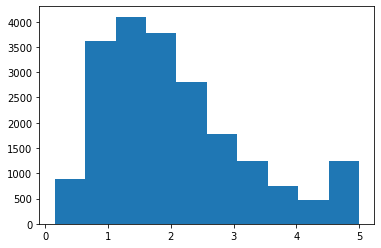

In [2]:
import matplotlib.pyplot as plt

plt.hist(y)

타겟 데이터를 보니 5에서 짤린 모습을 확인  
일단 학습, 테스트셋을 나눠야 하는데 범주형 데이터가 아니라 어떻게 계층별 스플릿을 할 수 있을지 고민...

### KBin 이산화 엔코더를 이용?

In [3]:
from sklearn.preprocessing import KBinsDiscretizer

kbin_disc = KBinsDiscretizer(n_bins=10, encode="ordinal")

(array([2061., 2059., 2070., 2054., 2071., 2067., 2066., 2062., 2064.,
        2066.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

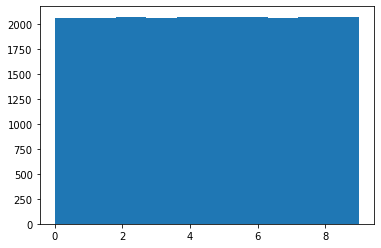

In [4]:
y_reshape = y.reshape([-1, 1])
y_kbins = kbin_disc.fit_transform(y_reshape)
plt.hist(y_kbins)

### 이산화 후 그것을 클래스삼아 계층적 스플릿

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for train_index, test_index in split.split(x, y_kbins):
    x_train = x[train_index]
    y_train = y_reshape[train_index]
    x_test = x[test_index]
    y_test = y_reshape[test_index]

(array([ 439., 1811., 2045., 1881., 1402.,  889.,  597.,  387.,  233.,
         636.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <BarContainer object of 10 artists>)

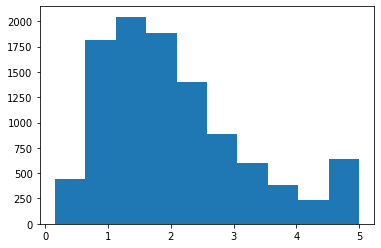

In [6]:
plt.hist(y_train)

(array([ 438., 1801., 2054., 1890., 1397.,  880.,  642.,  365.,  246.,
         607.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <BarContainer object of 10 artists>)

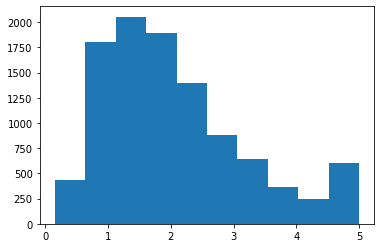

In [7]:
plt.hist(y_test)

## SVM 회귀 학습

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline

lin_svr = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svr", LinearSVR())
])

In [9]:
lin_svr.fit(x_train, y_train)

c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()), ('linear_svr', LinearSVR())])

In [10]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
mse

0.9305988679871308

In [11]:
from sklearn.metrics import mean_absolute_error

y_pred = lin_svr.predict(x_train)
mae = mean_absolute_error(y_train, y_pred)
mae

0.5179877989840881

예측할 값이 0~5인데 평균오차가 0.5면.. 거기다 학습데이터셋에 그런거면 좀 안좋아 보인다.

In [12]:
test_pred = lin_svr.predict(x_test)
mean_absolute_error(y_test, test_pred)

0.5041260690492718

테스트셋이랑 비슷하네?? 과적합이 거의 없음.  
학습, 테스트 스플릿이 아주 잘된 듯?

In [13]:
from sklearn.svm import SVR

svr = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"svr__C": [0.01, 0.1, 1, 10, 100], 
    "svr__kernel": ["linear", "poly", "rbf"],
    "svr__gamma": ["scale", "auto"]}
]

grid_search = GridSearchCV(svr, param_grid, cv=5, 
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

In [ ]:
grid_search.fit(x_train, y_train)

c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-